# Task 1: ANN (30%)
For this task, you are required to build a fully connect feed-forward ANN model
for a multi-label regression problem.

For the given data, you need do proper data preprocessing, design the ANN model,
then fine-tune your model architecture (number of layers, number of neurons,
activation function, learning rate, momentum, regularization).

For evaluating your model, do $80/20$ train test split.

### Data
You will be working with the data in `Task 1.csv` for predicting students'
scores in 3 different exams: math, reading and writing. The columns include:
 - gender
 - race
 - parental level of education
 - lunch meal plan at school
 - whether the student undertook the test preparation course

In [438]:
import pandas as pd
import numpy as np


In [439]:
# read csv file
df = pd.read_csv('Task 1.csv')

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [440]:
# encode gender column using sklearn
from sklearn.preprocessing import LabelEncoder

df["gender"] = LabelEncoder().fit_transform(df["gender"].values)
df["race/ethnicity"] = LabelEncoder().fit_transform(df["race/ethnicity"].values)
df["parental level of education"] = LabelEncoder().fit_transform(
    df["parental level of education"].values)
df["lunch"] = LabelEncoder().fit_transform(df["lunch"].values)
df["test preparation course"] = LabelEncoder().fit_transform(
    df["test preparation course"].values)

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,67,67,63
1,0,3,5,0,1,40,59,55
2,1,4,4,0,1,59,60,50
3,1,1,2,1,1,77,78,68
4,1,4,0,1,0,78,73,68


In [441]:
# apply min max scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer

DummyScaler = FunctionTransformer(lambda x: x)

scalers1 = [
    MinMaxScaler(),
    MinMaxScaler(),
    MinMaxScaler()
]

for i, col in enumerate(["math score", "reading score", "writing score"]):
    df[col] = scalers1[i].fit_transform(df[[col]])

# apply standard scaler
scalers2 = [
    FunctionTransformer(lambda x: x),
    FunctionTransformer(lambda x: x),
    FunctionTransformer(lambda x: x),
]

for i, col in enumerate(["math score", "reading score", "writing score"]):
    df[col] = scalers2[i].fit_transform(df[[col]])

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,0.620690,0.547945,0.519481
1,0,3,5,0,1,0.310345,0.438356,0.415584
2,1,4,4,0,1,0.528736,0.452055,0.350649
3,1,1,2,1,1,0.735632,0.698630,0.584416
4,1,4,0,1,0,0.747126,0.630137,0.584416


In [442]:
from sklearn.model_selection import train_test_split

# get the target columns
target = df[["math score", "reading score", "writing score"]].values
# drop the target columns
df = df.drop(["math score", "reading score", "writing score"], axis=1).values

X, y = df, target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X.shape, y.shape


((1000, 5), (1000, 3))

In [443]:
# build fully connected feed forward ANN
import tensorflow as tf
from keras.layers import Dense, Input
import keras
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping

model = keras.Sequential(
    [
        Dense(16, activation="relu", name="input"),
        Dense(3, name="output")
    ]
)

model.compile(loss="mae", optimizer=SGD(
    learning_rate=0.005), metrics=["accuracy"])

es = EarlyStopping(monitor='val_loss', mode='min',
                   verbose=1, patience=10, min_delta=1e-5)
history = model.fit(X_train, y_train, epochs=10000, verbose=1,
                    validation_data=(X_test, y_test), callbacks=[es])


Epoch 1/10000
25/25 [==============================] - 1s 13ms/step - loss: 0.7340 - accuracy: 0.3938 - val_loss: 0.5712 - val_accuracy: 0.3750
Epoch 2/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.4477 - accuracy: 0.4125 - val_loss: 0.3656 - val_accuracy: 0.3750
Epoch 3/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.3278 - accuracy: 0.3988 - val_loss: 0.3101 - val_accuracy: 0.4050
Epoch 4/10000
25/25 [==============================] - 0s 8ms/step - loss: 0.2997 - accuracy: 0.3812 - val_loss: 0.2884 - val_accuracy: 0.4200
Epoch 5/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2822 - accuracy: 0.3913 - val_loss: 0.2721 - val_accuracy: 0.4200
Epoch 6/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2677 - accuracy: 0.3913 - val_loss: 0.2586 - val_accuracy: 0.4100
Epoch 7/10000
25/25 [==============================] - 0s 5ms/step - loss: 0.2547 - accuracy: 0.3950 - val_loss: 0.2470 - val_accuracy: 0.405

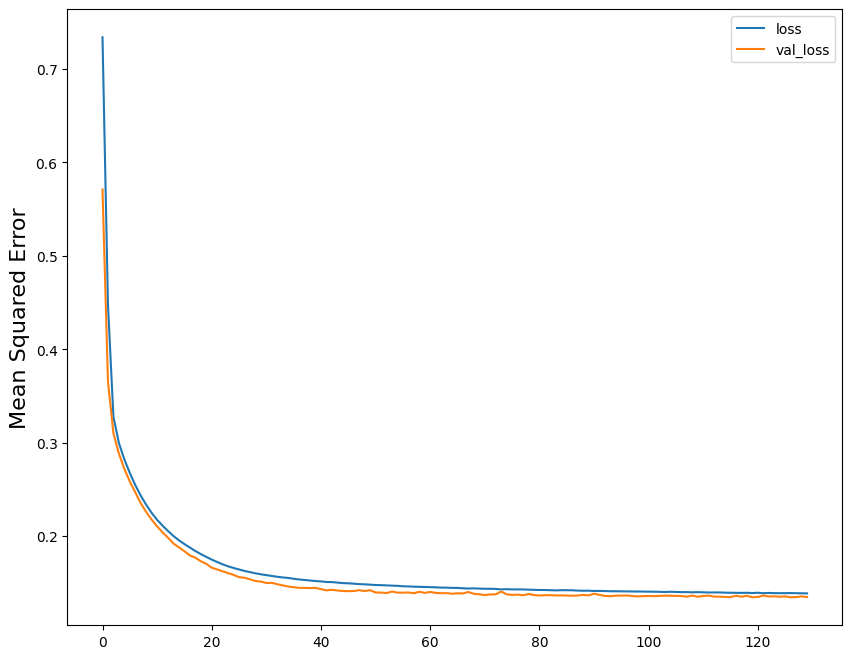

In [444]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error", fontsize=16)
plt.show()


In [445]:
from os import path
import os.path
score = model.evaluate(X_test, y_test, verbose=0)

for name, value in zip(model.metrics_names, score):
    print("Test", name, value)

# save results of model performance in csv file

# read results1.csv

# check whether the file exists or not

if path.exists('results1.csv'):
    df = pd.read_csv('results1.csv')
else:
    df = pd.DataFrame()

stringlist = []
model.summary(print_fn=lambda x: stringlist.append(x))
short_model_summary = "\n".join(stringlist)

# append the results to the dataframe
df = df.append(
    {'Loss': score[0], 'Accuracy': score[1], 'model_summary': short_model_summary}, ignore_index=True)
# add model summary with layers
df.to_csv("results1.csv", index=False)


Test loss 0.13485951721668243
Test accuracy 0.6000000238418579


/tmp/ipykernel_1294344/958144164.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(


7/7 [==============================] - 0s 2ms/step


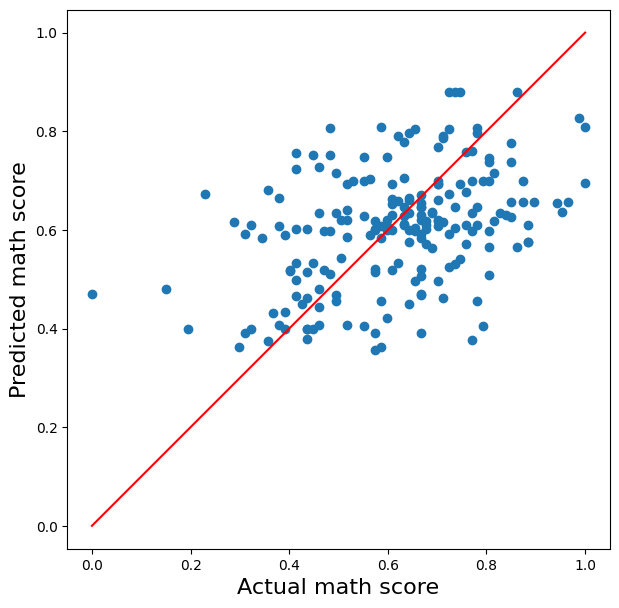

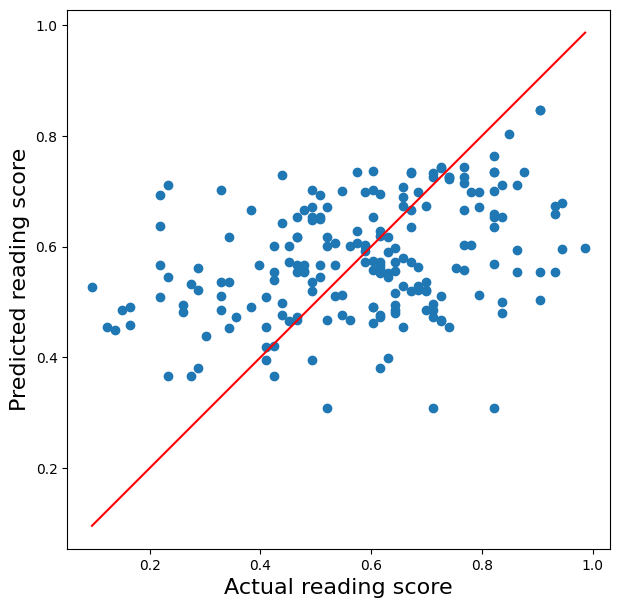

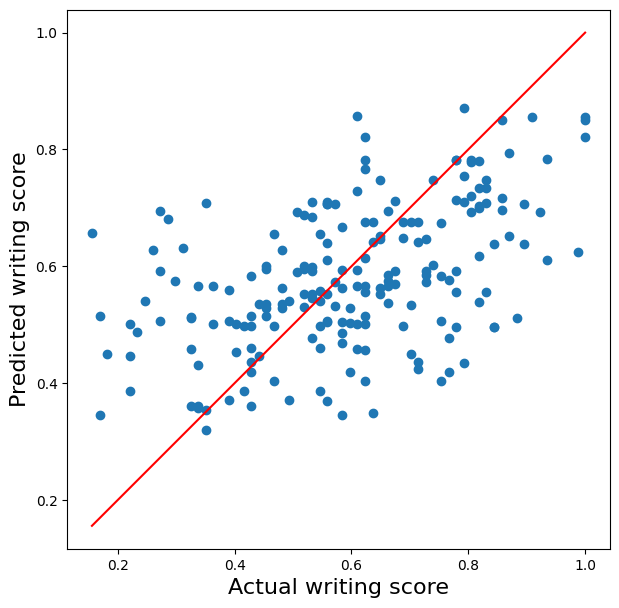

In [446]:
# predict on test data
y_pred = model.predict(X_test)

# plot the predicted values vs the actual values for each target on each plot
for i, col in enumerate(["math score", "reading score", "writing score"]):
    plt.figure(figsize=(7, 7))
    # set equal axis and aspect
    plt.axis('equal')
    # plot line y=x
    
    # x len is length between minimum and maximum from ytest and yres
    xlen = max(max(y_test[:, i]), max(y_pred[:, i])) - \
        min(min(y_test[:, i]), min(y_pred[:, i]))

    start = min(min(y_test[:, i]), min(y_pred[:, i]))

    plt.plot([start, start + xlen],
             [start, start + xlen], color='red')

    # plt.axis('square')
    plt.scatter(y_test[:, i], y_pred[:, i])
    plt.xlabel("Actual " + col, fontsize=16)
    plt.ylabel("Predicted " + col, fontsize=16)
    plt.show()


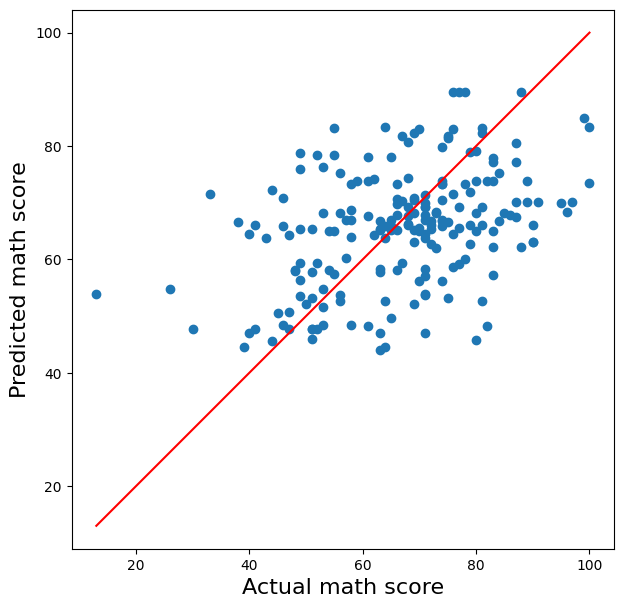

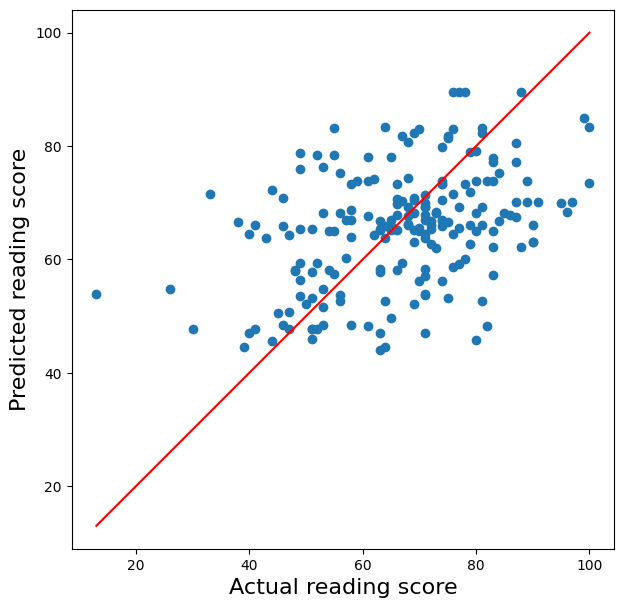

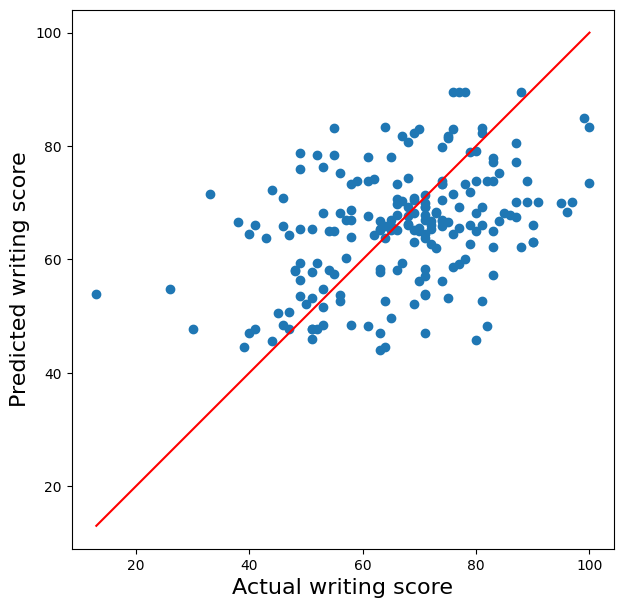

((200, 3), (200, 3))

In [447]:
# transform data back
yres = []
for i in range(3):
    yres.append(scalers2[0].inverse_transform(
        scalers1[0].inverse_transform(y_pred[:, 0].reshape(-1, 1))))

yres = np.array(yres).T[0]

ytest = []
for i in range(3):
    ytest.append(scalers2[0].inverse_transform(
        scalers1[0].inverse_transform(y_test[:, 0].reshape(-1, 1))))

ytest = np.array(ytest).T[0]

# plot the predicted values vs the actual values for each target on each plot
for i, col in enumerate(["math score", "reading score", "writing score"]):
    plt.figure(figsize=(7, 7))
    # set equal axis and aspect
    plt.axis('equal')
    # plot line y=x

    # x len is length between minimum and maximum from ytest and yres
    xlen = max(max(ytest[:, i]), max(yres[:, i])) - \
        min(min(ytest[:, i]), min(yres[:, i]))

    start = min(min(ytest[:, i]), min(yres[:, i]))

    plt.plot([start, start + xlen],
             [start, start + xlen], color='red')

    # plt.plot([np.min(ytest[:, i]), np.max(ytest[:, i])], [
    #          np.min(yres[:, i]), np.max(yres[:, i])], color='red')
    plt.scatter(ytest[:, i], yres[:, i])
    plt.xlabel("Actual " + col, fontsize=16)
    plt.ylabel("Predicted " + col, fontsize=16)
    plt.show()

yres.shape, ytest.shape


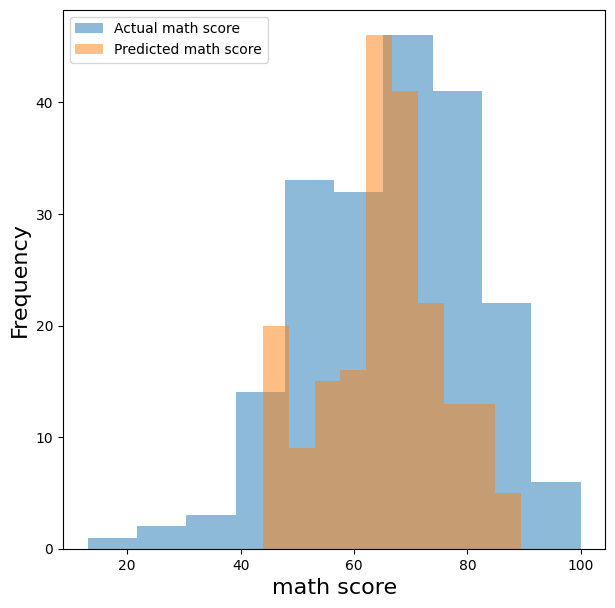

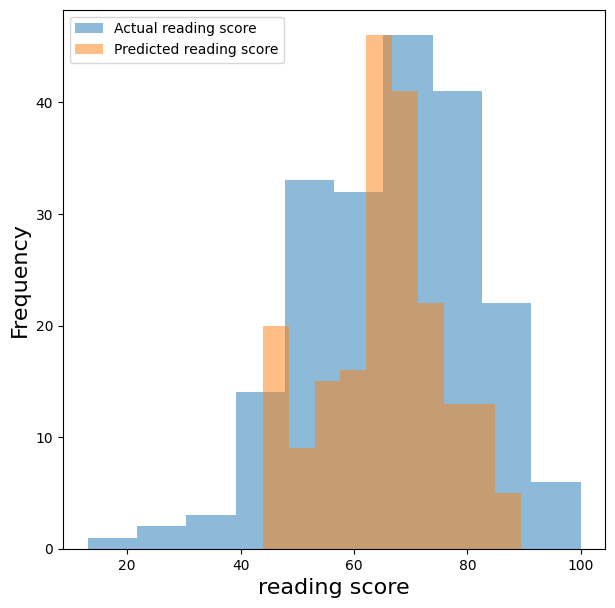

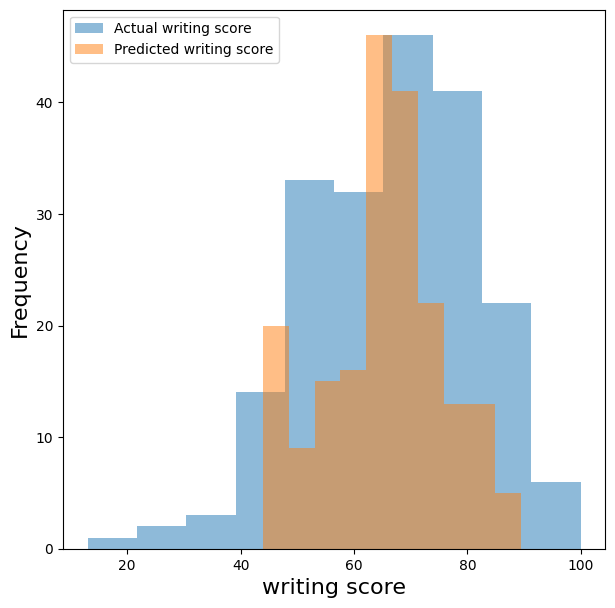

In [448]:
# plot target values per subject
for i, col in enumerate(["math score", "reading score", "writing score"]):
    plt.figure(figsize=(7, 7))
    plt.hist(ytest[:, i], alpha=0.5, label="Actual " + col)
    plt.hist(yres[:, i], alpha=0.5, label="Predicted " + col)
    plt.legend()
    plt.xlabel(col, fontsize=16)
    plt.ylabel("Frequency", fontsize=16)
    plt.show()


### Questions

1. What preprocessing techniques did you use? Why?
   1. I had to encode non numerical parameters. For this purpose I used sklearn.LabelEncoder and applied it to columns separately. I did not consider that using one-hot encoding would help to show more correlation between parameters and the targets.
   2. I tried to use data without any scaling and with MinMaxScaler. I found that the latter one gave better results. I think that is because the data was spread over a wide range of values (we can see it from histograms). So, scaling helped to make the data more uniform.
2. Describe the fine-tuning process and how you reached your model architecture.

   1. I started with trial and error approach first, trying to find the best combination of layers and neurons. For this purpose I tried to tune these hyperparameters, but instead it took much time and did not give any satisfactory result. After that I decided to try by hand and save each performance with model summary to the file, in order to find the best later. The best variant for me was with 2 layers:
      1. Input layer with 5 neurons
      1. 1st layer: 16 neurons
      1. 2nd layer: 3 neurons (output)

   Regarding results:

   Test loss:
   `0.1433128714561462`

   Test accuracy:
   `0.6800000071525574`
